--------------------
Nguyen Thanh Long

__________________

**OPTIMIZATION PROBLEMS**

An optimization problem involves finding the best solution (maximum or minimum) for an objective function within a set of constraints. In manufacturing and supply chains, the results of optimization problems help optimize the supply chain, plan production and delivery schedules, and allocate resources

In this section, I will use the `PuLP` library in the Python programming language to solve optimization problems. `PuLP` is an open-source library that helps formulate and great for solving:
- Linear Programming (LP) Problems
- Integer Programming (IP) Problems
- Mixed-Integer Programming (MIP) Problems
- Binary Integer Programming (BIP) Problems 
- 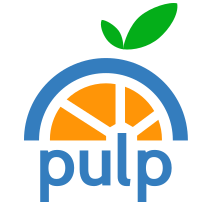

### Install libraries

In [ ]:
# Install libraries
!pip install pulp
!pip install numpy

In PuLP, there are two main ways to represent an optimization problem:
- Explicit Variable Definition
- Matrix Formulation (Using Dictionaries,Lists)

 *However, I recommend using the Matrix Formulation approach to automatically generate variables, making the coding process faster and more scalable.*

## EX1: Simple Linear Programming (LP) - **Maximization Problem**

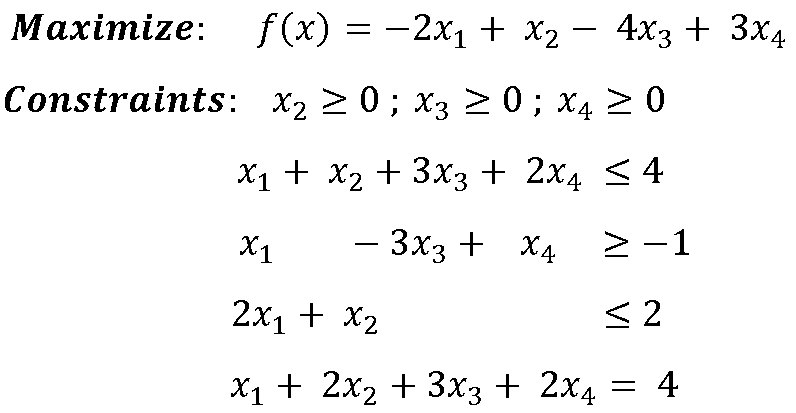

**Explicit Variable Definition**

In [26]:
from pulp import*

# Initialize the problem (Maximization problem)
model=LpProblem('EX1:Simple_Linear_Programming_(LP)_Maximization_Problem',LpMaximize)

# Define Variables 
x1=LpVariable('x1',cat='Continuous')
x2=LpVariable('x2',lowBound=0,cat='Continuous')
x3=LpVariable('x3',lowBound=0,cat='Continuous')
x4=LpVariable('x4',lowBound=0,cat='Continuous')

# Objective function
model += -2*x1 + x2  -4*x3 + 3*x4

# Constraints
model += x1 + x2 + 3*x3 +2*x4 <= 4
model += x1 - x3 +x4  >= -1
model += 2*x1 +x2 <= 2
model += x1+2*x2 + x3 + 2*x4 == 2

# Solve the problem
model.solve()

# Print results
print('Obiective value:',value(model.objective))
for v in model.variables():
  print(v.name,'=',v.varValue)

Obiective value: 17.0
x1 = -4.0
x2 = 0.0
x3 = 0.0
x4 = 3.0


-------------------------------

**Matrix Formulation**

In [43]:
from pulp import*
n=4                                 # Number of variables

#Initialize the coefficient weights of decision variables in the objective function
A = [-2, 1, -4, 3]  

# Initialize the coefficient weights of decision variables in the constraints
B = [[1, 1, 3, 2],[-1, 0, 1, -1],[2, 1, 0, 0],[1, 2, 1, 2],[-1, -2, -1, -2]] 

# Initialize the constraint limit values
C = [4, 1, 2, 2, -2]

# Initialize the problem
model=LpProblem('EX1:Simple_Linear_Programming_(LP)_Maximization_Problem_Matrix',LpMaximize)

# Automatic Variable Initialization
x = [LpVariable(f'x{i+1}', lowBound=0 if i > 0 else None, cat=LpContinuous) for i in range(n)]

# Objective Function
model += lpDot(A, x)

# Constraints
for i in range(len(C)):
    model += lpDot(B[i], x) <= C[i]
    
# Solve the problem
model.solve()

# Print results
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Objective value =", value(model.objective))

x1 = -4.0
x2 = 0.0
x3 = 0.0
x4 = 3.0
Objective value = 17.0


## EX2: Integer Programming (IP) - **Transportation Problem**

The Transportation Problem is a type of Linear Programming (LP) problem that aims to minimize the cost of transporting goods from multiple suppliers (sources) to multiple consumers (destinations) while satisfying supply and demand constraints.

**Decison variables:**
$X_{ij}$ ​=  of goods transported from supplier *i* to consumer *j*

**Objective Function:** Minimize the total transportation cost.

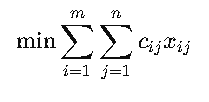  Where $c_{ij}$= cost per unit of transporting goods from supplier *i* to consumer *j*


**Constraints:**
- 1. Supply Constraint: he total amount shipped from each supplier cannot exceed its available supply.
     - 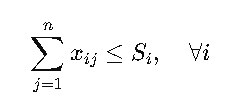
- 2. Demand Constraint: The total amount received by each consumer must meet its demand.
     - 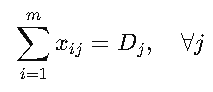

---------------

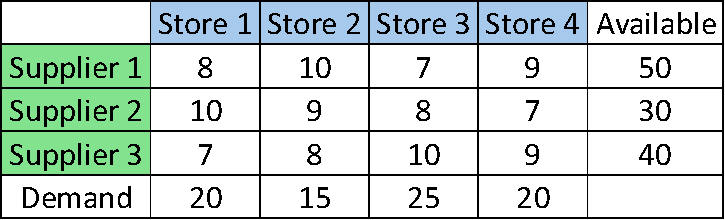

In [88]:
from pulp import *     

# Initialize the problem (Minimization problem)
model = LpProblem("Transportation_Problem", LpMinimize) 

supply = [50, 30, 40]      # Available supply of each supplier
demand = [20, 15, 25, 20]  # Demand of each store
cost = [[8, 10, 7, 9],
        [10, 9, 8, 7],
        [7, 8, 10, 9]]

# Create variables
x = LpVariable.dicts("x", [(i, j) for i in range(len(supply)) for j in range(len(demand))], lowBound=0, cat='Continuous')

# Objective Function (Minimize total cost)
model += lpSum(x[i, j] * cost[i][j] for i in range(len(supply)) for j in range(len(demand)))

# Constraints
for i in range(len(supply)):
    model += lpSum(x[i, j] for j in range(len(demand))) <= supply[i]  # Supply cannot exceed available supply

for j in range(len(demand)):
    model += lpSum(x[i, j] for i in range(len(supply))) == demand[j]  # Demand must be satisfied exactly

# Solve the problem
model.solve()

# Print results
for i in range(len(supply)):
    for j in range(len(demand)):
        print(f"The quantity supplied from supplier {i+ 1} to store {j+ 1}: {x[i, j].varValue}")

total_cost = sum(x[i, j].varValue * cost[i][j] for i in range(len(supply)) for j in range(len(demand)))
print(f"Total cost: {total_cost}")

The quantity supplied from supplier 1 to store 1: 0.0
The quantity supplied from supplier 1 to store 2: 0.0
The quantity supplied from supplier 1 to store 3: 25.0
The quantity supplied from supplier 1 to store 4: 0.0
The quantity supplied from supplier 2 to store 1: 0.0
The quantity supplied from supplier 2 to store 2: 0.0
The quantity supplied from supplier 2 to store 3: 0.0
The quantity supplied from supplier 2 to store 4: 20.0
The quantity supplied from supplier 3 to store 1: 20.0
The quantity supplied from supplier 3 to store 2: 15.0
The quantity supplied from supplier 3 to store 3: 0.0
The quantity supplied from supplier 3 to store 4: 0.0
Total cost: 575.0


## EX3: Binary Integer Programming (BIP)- **Assignment Problem**

The Assignment Problem is an optimization problem where n tasks are assigned to m workers/machines to minimize cost or maximize efficiency. 

This is Decision-making problems,(Yes/No or On/Off) are solved using Binary Integer Programming (BIP).

**Objective Function:** Minimize total cost or maximize total efficiency

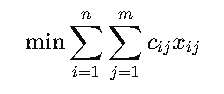

Where: 
- $c_{ij}$ is the cost or benefit of assigning task *i* to worker *j*
- $x_{ij}$ is a decision variable 1 if task *i* is assigned to worker *j*, 0 otherwise)

**Constraints:**
- $x_{ij}$ $\in$ {0,1} (Integer Programming - IP)

- Each task is assigned to exactly one worker:

   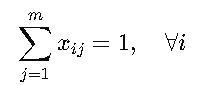

- Each worker handles only one task:

  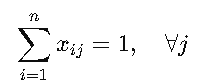

EX3

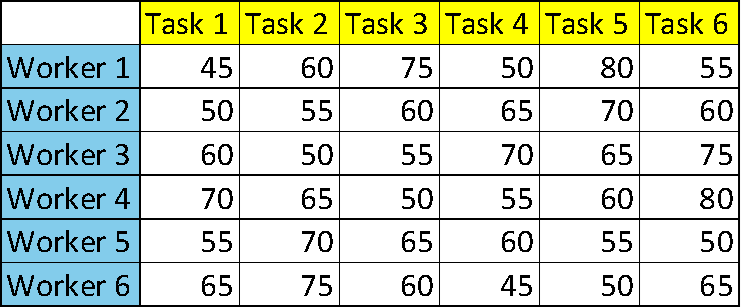

In [100]:
from pulp import *

num_workers = 6          
num_tasks   = 6
time = [
    [45, 50, 60, 70, 55, 65],
    [60, 55, 50, 65, 70, 75],
    [75, 60, 55, 50, 65, 60],
    [50, 65, 70, 55, 60, 45],
    [80, 70, 65, 60, 55, 50],
    [55, 60, 75, 80, 50, 65]]

# Initialize the problem (Minimization problem)
model = LpProblem("Assignment_Problem", LpMinimize)

# Create variables
x = LpVariable.dicts("x", [(i, j) for i in range(num_workers) for j in range(num_tasks)], cat=LpBinary)

# Objective Function (Minimize total time)
model += lpSum(time[i][j] * x[(i, j)] for i in range(num_workers) for j in range(num_tasks))

# Constraints
# Each worker is assigned exactly one task
for i in range(num_workers):
    model += lpSum(x[(i, j)] for j in range(num_tasks)) == 1    

# Each task is assigned to exactly one worker
for j in range(num_tasks):
    model += lpSum(x[(i, j)] for i in range(num_workers)) == 1             

# Solve the problem
model.solve()

# Print results
for i in range(num_workers):
    for j in range(num_tasks):
        if value(x[(i, j)]) == 1:
            print(f"Worker {i+1} is assigned to Task {j+1}") 
total_time = value(model.objective)
print(f"Minimum total time: {total_cost}")

Worker 1 is assigned to Task 2
Worker 2 is assigned to Task 3
Worker 3 is assigned to Task 4
Worker 4 is assigned to Task 1
Worker 5 is assigned to Task 6
Worker 6 is assigned to Task 5
Minimum total time: 300.0


## EX4: Mixed-Integer Programming (MIP) Problem - **Manufacturing Planning**

A factory produces two types of products: **A** and **B**. The factory has limited **machine time** and **labor hours**, and it must determine the number of each product to manufacture in order to maximize profit while satisfying resource constraints.

- Each Product A gives 50 dollars profit
- Each Product B gives 40 dollars profit
- Each extra labor hour costs 5 dollars
- Machine hours available = 100
- Base labor hours = 120, but extra labor *y* can be used

**Decison variable:**
- $x_{1}$ = Number of Product A to produce (Integer)
- $x_{2}$ = Number of Product B to produce (Integer)
-    *y*    = Extra labor hours used (Continuous)

**Objective Function** : Maximize Profit

**Constraints**:

- Machine Time Constraint: Machine hours available = 100
- Labor Hour Constraint : Base labor hours = 120, but extra labor *y* can be used
- $x_{1}$, $x_{2}$ are Integer , $x_{1}$, $x_{2}$ > 0
- *y*  $\geq$ 0 

In [35]:
from pulp import *

# Initialize the problem
model = LpProblem("Manufacturing_Planning_MIP", LpMaximize)

# Decision Variables
x_A = LpVariable("Product_A", lowBound=0, cat="Integer")
x_B = LpVariable("Product_B", lowBound=0, cat="Integer")
y = LpVariable("Extra_Labor", lowBound=0, cat="Continuous")

# Objective Function (Maximize Profit)
model += 50*x_A + 40*x_B - 5*y

# Constraints
model += 2*x_A + x_B <= 100  # Machine Time Constraint
model += 3*x_A + 2*x_B <= 120 + y  # Labor Constraint
model += x_A <= 40  # Product A Demand Constraint
model += x_B <= 50  # Product B Demand Constraint

# Solve the model
model.solve()

# Print Results
print(f"Product A: {x_A.varValue} units")
print(f"Product B: {x_B.varValue} units")
print(f"Extra Labor Used: {y.varValue} hours")
print(f"Maximum Profit: ${value(model.objective)}")

Product A: 25.0 units
Product B: 50.0 units
Extra Labor Used: 55.0 hours
Maximum Profit: $2975.0
